In [39]:
import matplotlib.pylab as pl
%matplotlib inline
import minpy.numpy as np
from scipy.stats import norm as gaussian
from std_estimator import std

In [40]:
limit = 0.5
activations = {'symmetric DReLU' : lambda X: np.minimum(limit, np.maximum(-limit, X))}

In [43]:
import sys
sys.path.append('../cifar10')
from utilities.data_utility import load_cifar10
data = load_cifar10('../cifar10/utilities/cifar/', rescale=True)

In [44]:
# X = np.random.normal(0, 1, (10000, 3072))
X = np.copy(data[2])
D = [3072, 1024, 512, 256, 128, 64, 16]
# D = (3072,) + (1024,) * 6
weights = [np.random.normal(0, 1 / float(D[0]) ** 0.5, (D[0], D[1]))]
weights += \
    [np.random.normal(0, 1 / (std(limit) * float(D[i]) ** 0.5), (D[i], D[i + 1])) for i in range(1, len(D) - 1)]

pre-activation: 13.34927845 post-activation: 0.494562089443 ratio: 0.0370478518307
pre-activation: 1.18141508102 post-activation: 0.440086066723 ratio: 0.372507572174
pre-activation: 0.986062347889 post-activation: 0.427673399448 ratio: 0.433718413115
pre-activation: 0.988598406315 post-activation: 0.42884260416 ratio: 0.433788478374
pre-activation: 0.980144560337 post-activation: 0.428077340126 ratio: 0.436749190092
pre-activation: 0.946815729141 post-activation: 0.419604420662 ratio: 0.44317433238


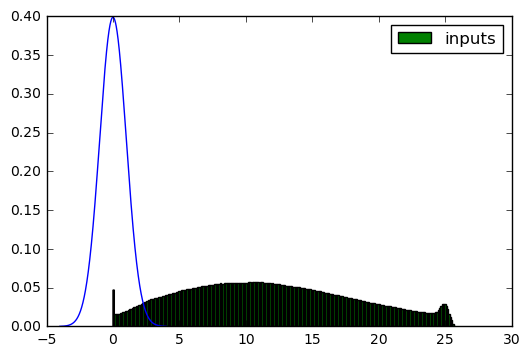

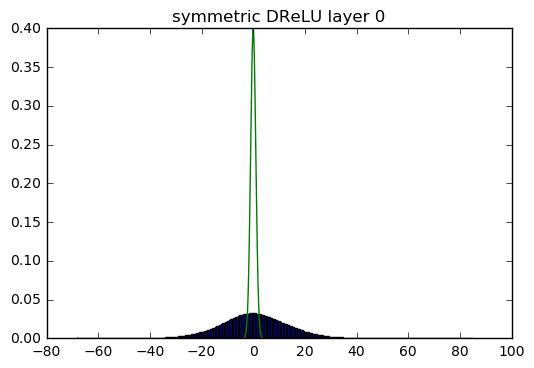

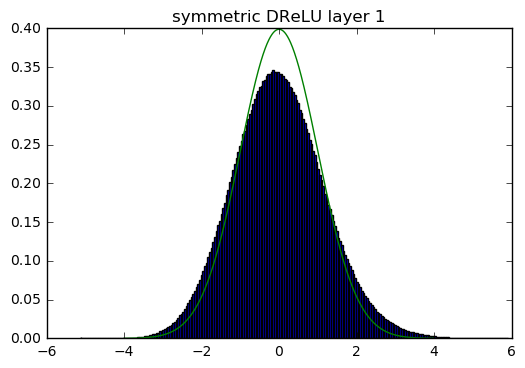

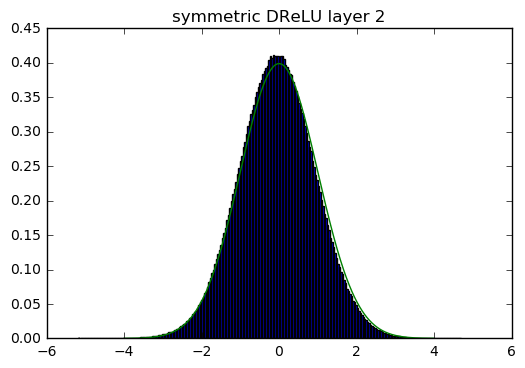

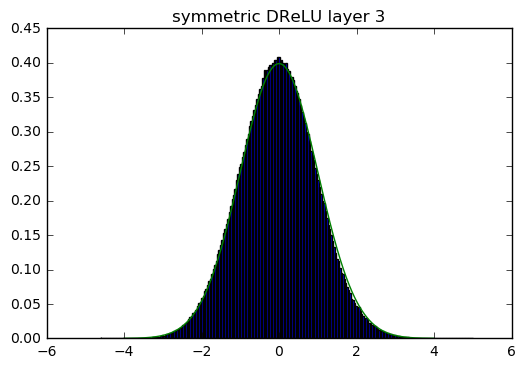

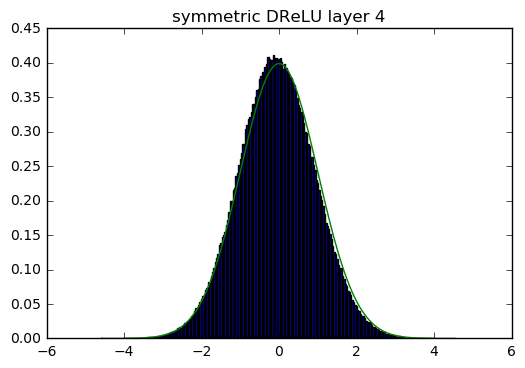

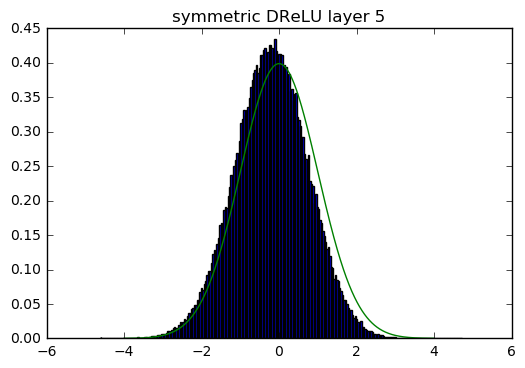

In [45]:
BINS = 256
linespace = np.linspace(-4, 4, 1000).asnumpy()

for key, activation in activations.items():
    inputs = X
    pl.plot(linespace, gaussian.pdf(linespace))
    pl.hist(inputs.asnumpy().flatten(), bins=BINS, normed=True, label='inputs')
    pl.legend()
    for index, W in enumerate(weights):
        inputs = np.dot(inputs, W)
        
        pl.figure()
        pl.title('%s layer %d' % (key, index))
        pl.hist(inputs.asnumpy().flatten(), bins=BINS, normed=True)
        pl.plot(linespace, gaussian.pdf(linespace))
        
        pre_mean = np.mean(inputs)
        pre_std = np.std(inputs)
        inputs = activation(inputs)
        post_mean = np.mean(inputs)
        post_std = np.std(inputs)
#         print pre_mean, post_mean
        print 'pre-activation: {:<8} post-activation: {:<8} ratio: {:<8}'.format(
            pre_std,
            post_std,
            post_std / pre_std
        )